In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

In [2]:
# Read data
train =  pd.read_csv("loan_train.csv")

In [3]:
train.shape

(614, 13)

In [4]:
# Features in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Univariate Analysis

### Univariate Analysis for Categorical Variables 

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

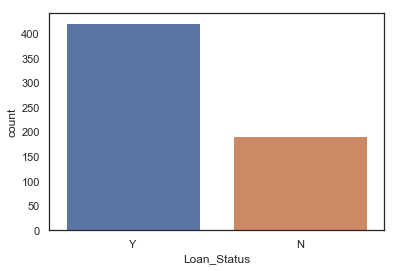

In [10]:
# Bar graph for loan_status
sns.countplot(x="Loan_Status", data=train)

In [11]:
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

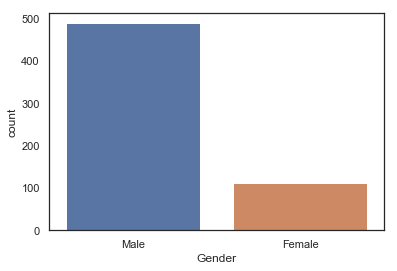

In [12]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

In [13]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [14]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

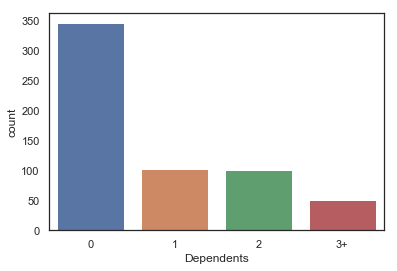

In [15]:
# Bar graph for dependents 
sns.countplot(x="Dependents", data=train)

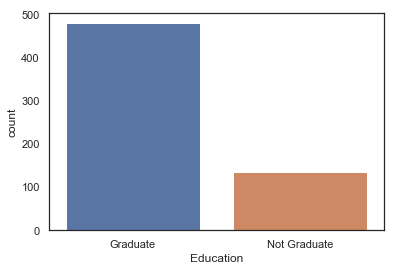

In [16]:
sns.countplot("Education", data=train)

In [17]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

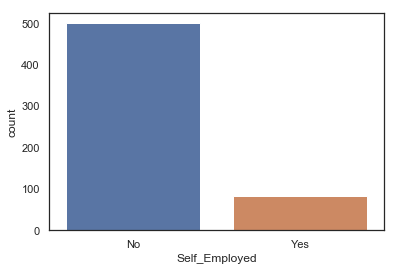

In [18]:
# Bar graph of Self_Employed
sns.countplot("Self_Employed",data=train)

In [19]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
print(train['Self_Employed'].isnull().sum())   # Missing count 
print(train['Gender'].isnull().sum())   # Missing count 
print(train['Married'].isnull().sum())   # Missing count 

32
13
3


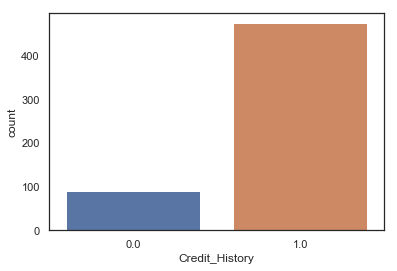

In [21]:
# Bar graph of Credit_History
sns.countplot(x='Credit_History',data=train)

In [22]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [23]:
print(train['Credit_History'].isnull().sum())   # Missing count 

50


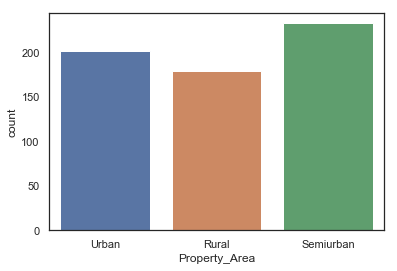

In [24]:
# Bar graph of Property_Area
sns.countplot(x='Property_Area',data=train)

In [25]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

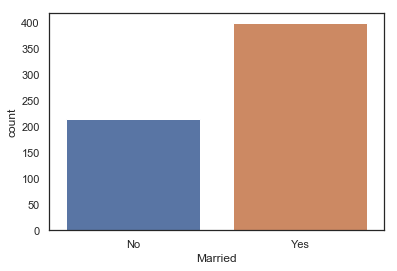

In [26]:
# Bar Graph for Married
sns.countplot(x="Married",data=train)

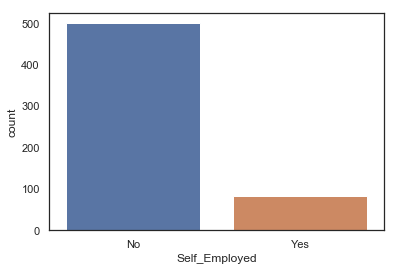

In [27]:
# Bar Graph for Self_Employed
sns.countplot(x="Self_Employed",data=train)

###  Univariate Analysis for Continous Variables 

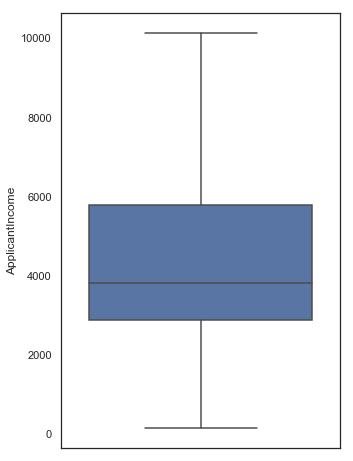

In [29]:
# Visualizing numerical features
plt.gcf().set_size_inches(5,8)
sns.boxplot(x="ApplicantIncome",data=train, orient='vertical', showfliers=False)

#### display how many outliers in ApplicantIncome 

In [30]:
app_income = train["ApplicantIncome"]

In [36]:
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print(q1,q2,q3)

2877.5 3812.5 5795.0


In [34]:
iqr = q3 - q1

In [35]:
iqr

2917.5

In [44]:
print("Higher outliers : ", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower  outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Higher outliers :  50
Lower  outliers :  0


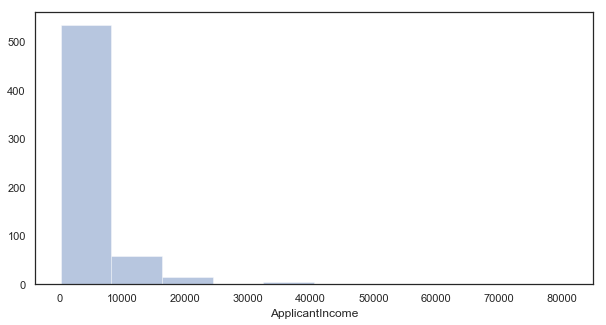

In [38]:
sns.distplot(train["ApplicantIncome"],bins=10,kde=False) 
plt.gcf().set_size_inches(10,5)

Text(0.5, 1.0, 'Applicant Income By Education')

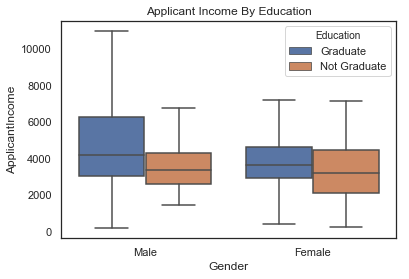

In [41]:
sns.boxplot(x="Gender",y='ApplicantIncome', hue="Education", data=train, showfliers =False)
plt.title("Applicant Income By Education")
# plt.suptitle("")  # Suppress default title

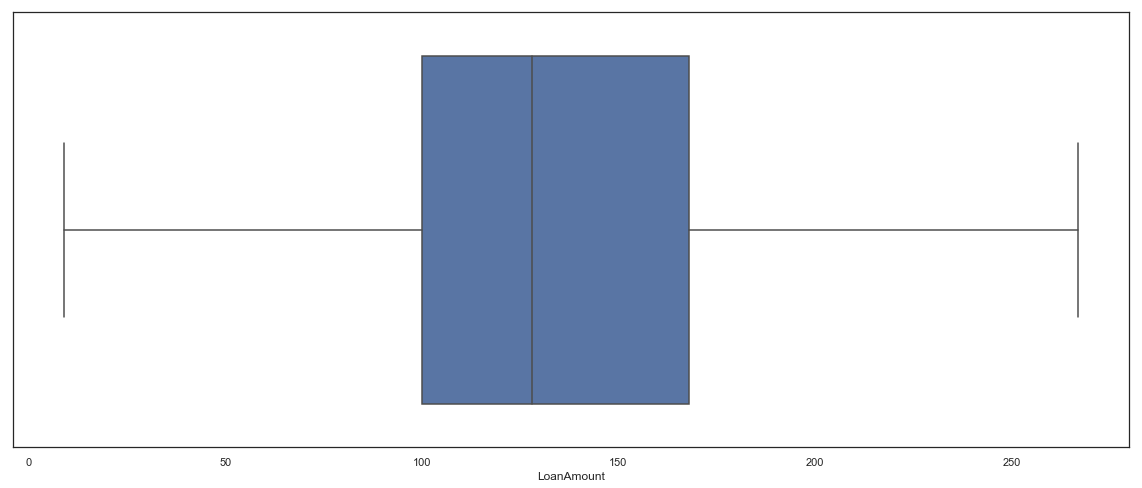

In [45]:
sns.boxplot(train["LoanAmount"], showfliers = False)
plt.gcf().set_size_inches(20,8)

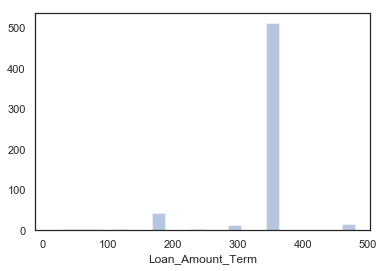

In [51]:
sns.distplot(train["Loan_Amount_Term"], kde=False)

##  Bivariate Ananlysis

In [53]:
pd.crosstab(columns=train['Loan_Status'], index=train['Property_Area'], values=train['Loan_ID'], aggfunc='count')

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [54]:
train.groupby(['Property_Area','Loan_Status'], as_index=False)['Loan_ID'].count()

,Property_Area,Loan_Status,Loan_ID
0,Rural,N,69
1,Rural,Y,110
2,Semiurban,N,54
3,Semiurban,Y,179
4,Urban,N,69
5,Urban,Y,133


In [58]:
train.groupby(['Gender','Education'])['ApplicantIncome'].mean()

Gender  Education   
Female  Graduate        4646.467391
        Not Graduate    4629.700000
Male    Graduate        5992.345745
        Not Graduate    3630.061947
Name: ApplicantIncome, dtype: float64

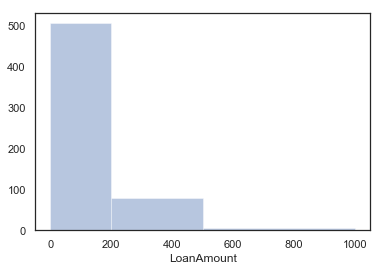

In [62]:
sns.distplot( train['LoanAmount'], bins=[0,200,500,1000], kde=False)

  Loan_Status  Gender Married  Loan_ID
0           N  Female      No       29
1           N  Female     Yes        8
2           N    Male      No       49
3           N    Male     Yes      101
4           Y  Female      No       51
5           Y  Female     Yes       23
6           Y    Male      No       81
7           Y    Male     Yes      256


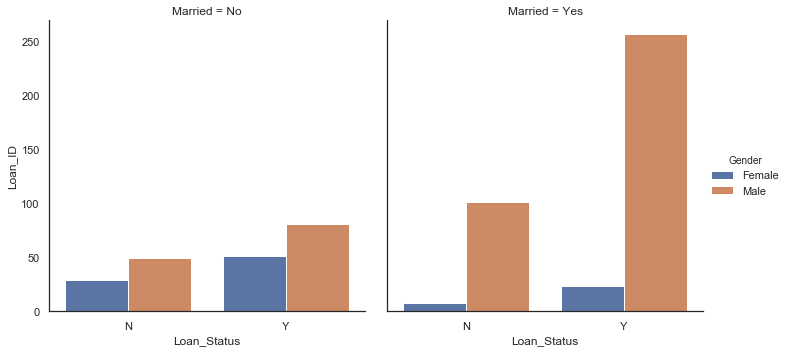

In [65]:
d = train.groupby(by=["Loan_Status","Gender","Married"], as_index=False)['Loan_ID'].count()
# d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Loan_Status",y="Loan_ID", hue="Gender",col="Married", data=d, kind="bar")

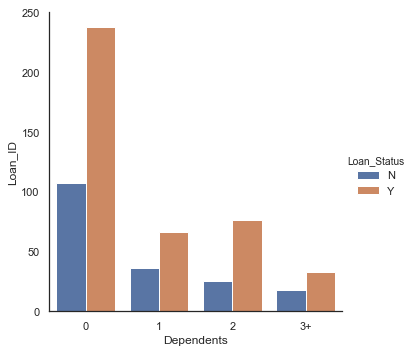

In [66]:
d = train.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Dependents",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

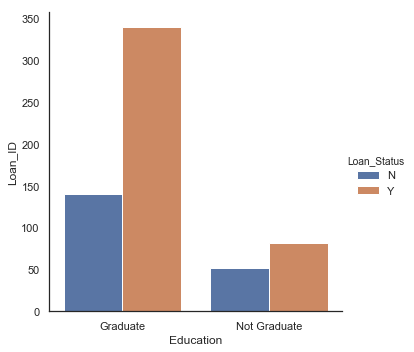

In [67]:
d = train.groupby(by=["Loan_Status","Education"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Education",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Self_Employed  Loan_ID
0           N            No      157
1           N           Yes       26
2           Y            No      343
3           Y           Yes       56


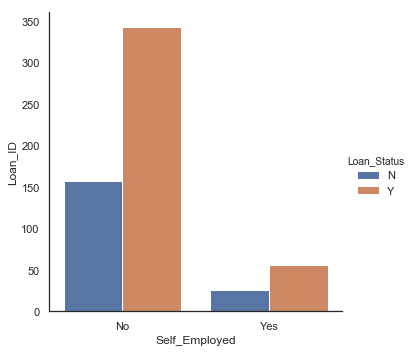

In [68]:
d = train.groupby(by=["Loan_Status","Self_Employed"], as_index=False)['Loan_ID'].count()
print(d)
sns.catplot(x="Self_Employed",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

  Loan_Status  Credit_History  Count
0           N             0.0     82
1           N             1.0     97
2           Y             0.0      7
3           Y             1.0    378


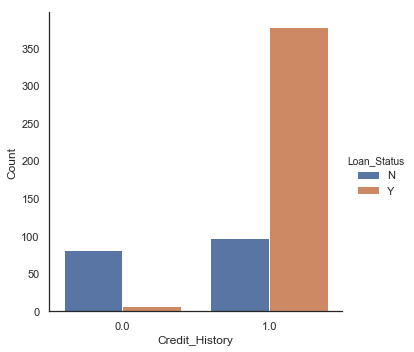

In [36]:
d = train.groupby(by=["Loan_Status","Credit_History"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Credit_History",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Property_Area  Count
0           N         Rural     69
1           N     Semiurban     54
2           N         Urban     69
3           Y         Rural    110
4           Y     Semiurban    179
5           Y         Urban    133


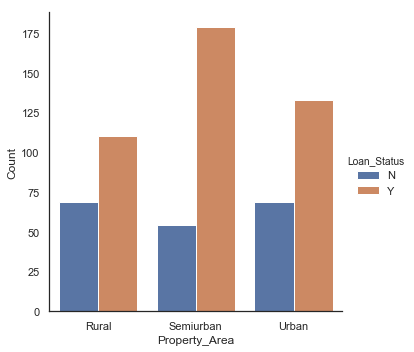

In [69]:
d = train.groupby(by=["Loan_Status","Property_Area"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Property_Area",y="Count", hue="Loan_Status", data=d, kind="bar")

In [70]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,85000]
group=['Low','Average','High', 'Very high']
# Create a new column for income bin  
train['Income_Bin']= pd.cut(train['ApplicantIncome'],bins,labels=group)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Income_Bin           614 non-null category
dtypes: category(1), float64(4), int64(1), object(8)
memory usage: 63.2+ KB


In [40]:
train[['ApplicantIncome','Income_Bin']]

,ApplicantIncome,Income_Bin
0,5849,High
1,4583,High
2,3000,Average
3,2583,Average
4,6000,High
5,5417,High
6,2333,Low
7,3036,Average
8,4006,High
9,12841,Very high


  Loan_Status Income_Bin  Count
0           N        Low     34
1           N    Average     67
2           N       High     45
3           N  Very high     46
4           Y        Low     74
5           Y    Average    159
6           Y       High     98
7           Y  Very high     91


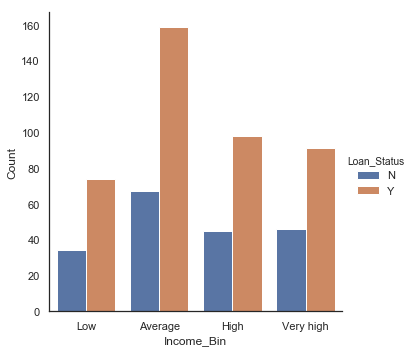

In [41]:
d = train.groupby(by=["Loan_Status","Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [72]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

  Loan_Status Coapplicant_Income_Bin  Count
0           N                    Low      3
1           N                Average     61
2           N                   High     32
3           Y                    Low     19
4           Y                Average    161
5           Y                   High     65


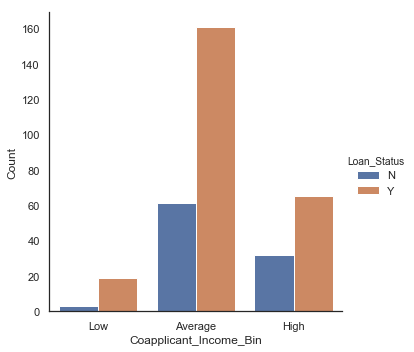

In [73]:
d = train.groupby(by=["Loan_Status","Coapplicant_Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Coapplicant_Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [74]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_Bin']=pd.cut(train['LoanAmount'],bins,labels=group)

  Loan_Status LoanAmount_Bin  Count
0           N            Low     47
1           N        Average    103
2           N           High     31
3           Y            Low    107
4           Y        Average    255
5           Y           High     49


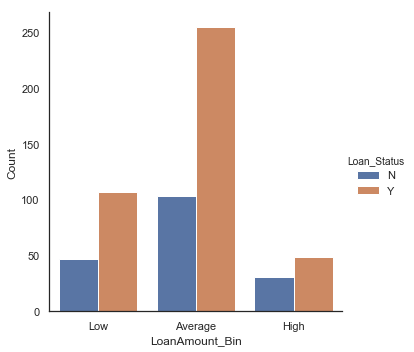

In [45]:
d = train.groupby(by=["Loan_Status","LoanAmount_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmount_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

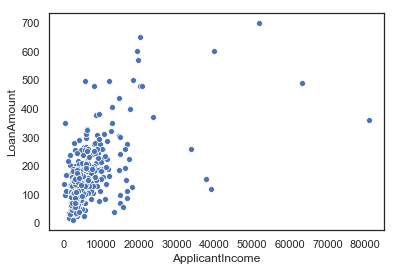

In [75]:
sns.scatterplot(x="ApplicantIncome", y = "LoanAmount", data = train)

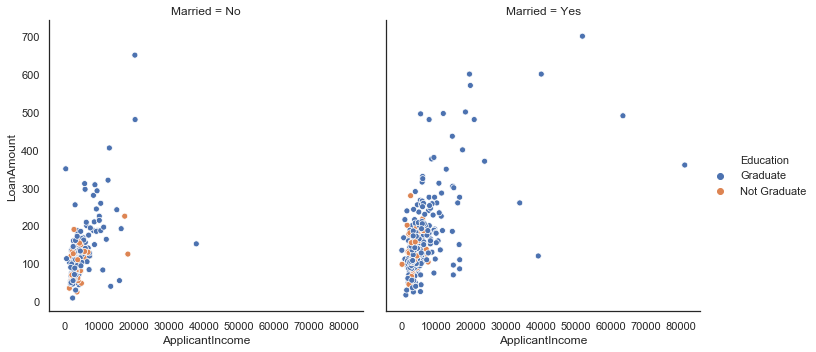

In [47]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", data = train, hue="Education", col="Married")

## Data Wrangling 

In [48]:
# Drop the new variable of bins
train=train.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'LoanAmount_Bin'], axis=1)

In [4]:
# Convert Dependents to str 
train['Dependents'] = train["Dependents"].astype('str')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
# replacing 3+ in Dependents variable with 3
train['Dependents'].replace(to_replace = ['0', '1', '2', '3+'], value=['0', '1','2', '3'],inplace=True)

In [9]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace(to_replace =['N','Y'], value=[0,1],inplace=True)

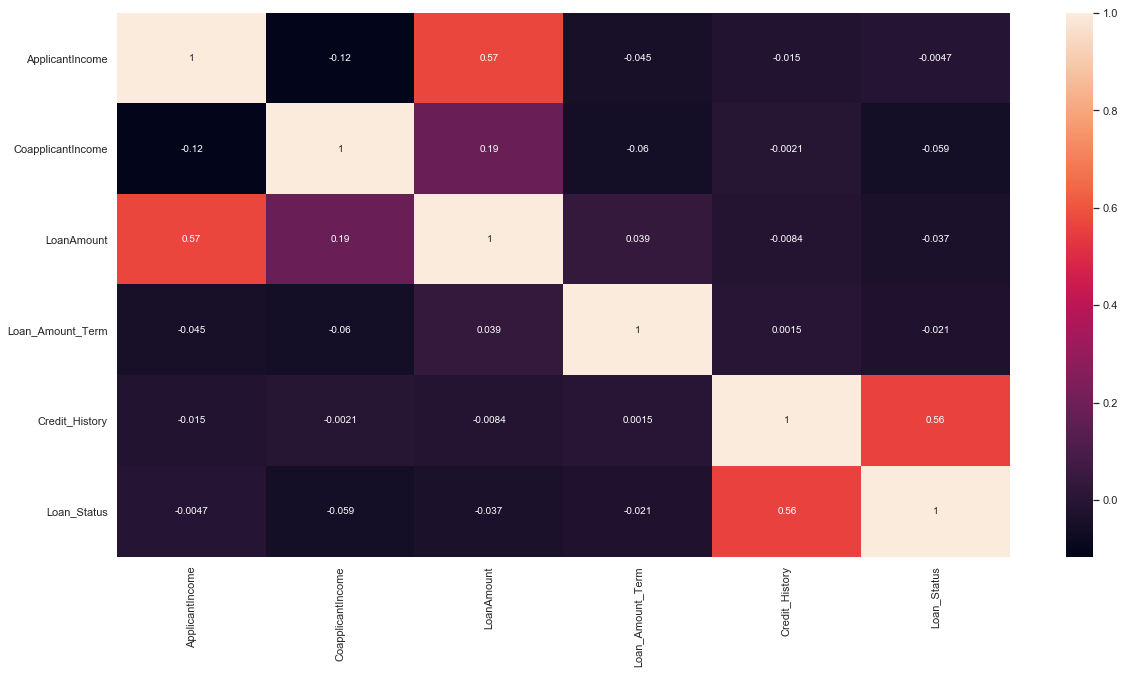

In [10]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr()
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(20,10)

### Missing value and outlier treatment

In [11]:
# Checking the missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [14]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [31]:
dmode = train['Dependents'].mode()[0]

In [32]:
dmode

'0'

In [34]:
train.loc[train['Dependents'] == 'nan','Dependents'] = dmode

In [36]:
(train['Dependents'] == 'nan').isnull().sum()

0

In [55]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [16]:
train['LoanAmount'].mean(), train['LoanAmount'].median()

(146.41216216216216, 128.0)

In [17]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [19]:
# Define function to return value of this pivot_table
def get_loan_amount(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [20]:
# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(get_loan_amount, axis=1), inplace=True)

In [29]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

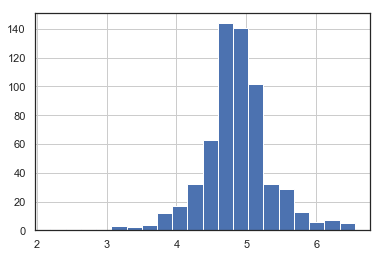

In [22]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

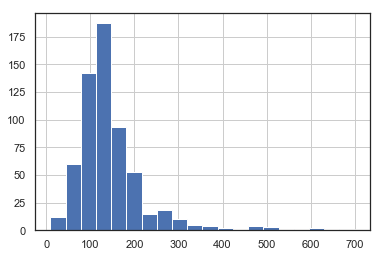

In [23]:
train['LoanAmount'].hist(bins=20)

In [24]:
# Drop loan_ID column 
train=train.drop('Loan_ID',axis=1)

In [5]:
## read data from final csv
train = pd.read_csv("final_train.csv")

In [6]:
y = train.Loan_Status
X = train.drop('Loan_Status',axis=1)

In [7]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_log'],
      dtype='object')

In [8]:
# Adding dummies to the dataset
X=pd.get_dummies(X)

In [9]:
X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [48]:
X.shape

(614, 20)

In [50]:
!!cd

['E:\\classroom\\ds\\may6\\loan']

In [49]:
# Save dataframe
train.to_csv("final_train.csv",index=False)

## Build Model using Logistic Regression

In [18]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Split data into train and test data 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [14]:
X_train.shape, X_test.shape

((491, 18), (123, 18))

In [15]:
# logistic regression   
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8373983739837398


### Display confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15, 18],
       [ 2, 88]], dtype=int64)

### Display classification report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

   micro avg       0.84      0.84      0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



### Micro model for deployment demo

In [78]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [19]:
X = train[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History']]

In [20]:
y = train['Loan_Status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 90 to 559
Data columns (total 5 columns):
LoanAmount           491 non-null float64
ApplicantIncome      491 non-null int64
CoapplicantIncome    491 non-null float64
Loan_Amount_Term     491 non-null float64
Credit_History       491 non-null float64
dtypes: float64(4), int64(1)
memory usage: 23.0 KB


In [23]:
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8373983739837398


In [25]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [26]:
# Pickle model 
pd.to_pickle(model,'lr_model.pkl')

In [27]:
X.columns

Index(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [31]:
status = model.predict([[400,1000,0,180,1],[1000,1000,1000,360,1]])
print(status)

[1 1]


### Feature Engineering

In [42]:
train = pd.read_csv("final_train.csv")

In [43]:
# Total_Income feature
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

d:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


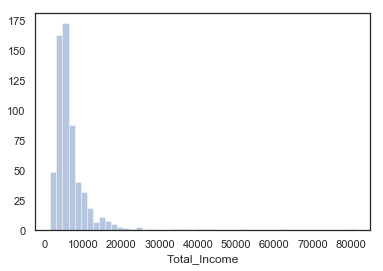

In [33]:
sns.distplot(train['Total_Income'],kde=False)

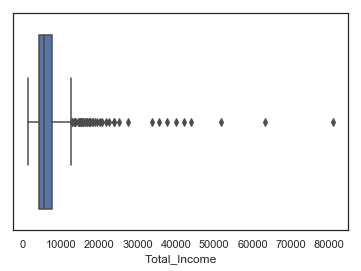

In [34]:
sns.boxplot(train['Total_Income'])

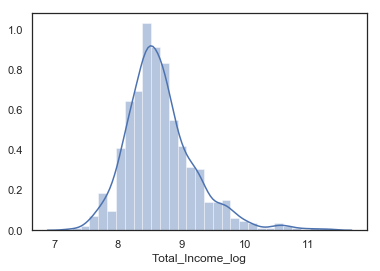

In [44]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);

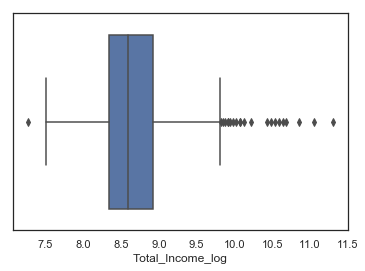

In [36]:
sns.boxplot(train['Total_Income_log'])

In [45]:
# EMI feature
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000

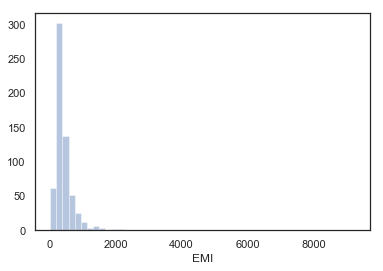

In [38]:
sns.distplot(train['EMI'],kde=False)

In [46]:
# Balance Income feature
train['Balance_Income']=train['Total_Income']-(train['EMI']) 

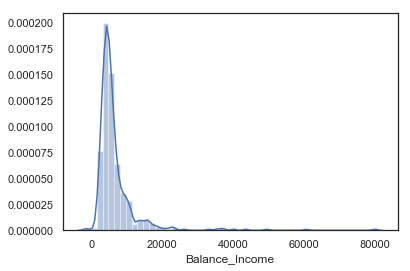

In [40]:
sns.distplot(train['Balance_Income']);

### Logistic Regression after adding features 

In [47]:
train.shape

(614, 17)

In [48]:
y.shape

(614,)

In [50]:
train = pd.get_dummies(train)

In [51]:
train.shape

(614, 23)

### Split data into train and test data 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train,y)

In [53]:
# logistic regression   
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
pred_test = model.predict(X_test)
score = accuracy_score(y_test,pred_test)
print('accuracy_score',score)   

accuracy_score 1.0


In [58]:
X_train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance_Income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 1.0


In [62]:
confusion_matrix(y_test, y_pred)

array([[ 46,   0],
       [  0, 108]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       108

   micro avg       1.00      1.00      1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.9935064935064936


## Naive Bayes 

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.974025974025974


In [70]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 46,   0],
       [  4, 104]], dtype=int64)

In [184]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.51      0.62        59
          1       0.75      0.93      0.83        95

avg / total       0.77      0.77      0.75       154



## Support Vector Machines

In [71]:
from sklearn.svm import SVC

In [72]:
model = SVC()
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7077922077922078


In [75]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  1,  45],
       [  0, 108]], dtype=int64)

In [222]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        46
          1       0.70      1.00      0.82       108

avg / total       0.49      0.70      0.58       154



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Check cross validation scores with different algorithms 

In [22]:
train = pd.read_csv("final_train.csv")
train_o = pd.read_csv("loan_train.csv")
y = train_o.Loan_Status

In [23]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [24]:
train =pd.get_dummies(train)

In [25]:
train.shape

(614, 19)

In [26]:
train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
Dependents                 614 non-null int64
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: flo

In [30]:
X = train
X.shape

(614, 19)

In [28]:
y.shape

(614,)

In [29]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [31]:
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f%%' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1. 1. 1. 1. 1.]
The accuration of LogisticRegression is 100.00%


d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of GaussianNB is %.2f%%' % (scores.mean()*100))
all_scores['GaussianNB'] = scores.mean() * 100

[1.         0.98387097 0.99180328 0.98360656 1.        ]
The accuration of GaussianNB is 99.19%


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of DecisionTreeClassifier is %.2f%%' % (scores.mean()*100))
all_scores['DecisionTreeClassifier'] = scores.mean() * 100

[1. 1. 1. 1. 1.]
The accuration of DecisionTreeClassifier is 100.00%


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=10)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of RandomForestClassifier is %.2f%%' % (scores.mean()*100))
all_scores['RandomForestClassifier'] = scores.mean() * 100

The accuration of RandomForestClassifier is 99.84%


[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier')]

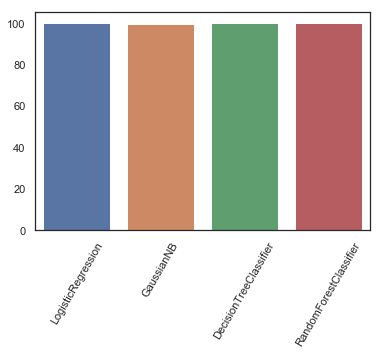

In [36]:
all_scores.keys()
all_scores.values()
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logestic Regression with built-in Cross Validation

In [193]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [195]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8051948051948052
